In [8]:
import numpy as np
import cv2
import seaborn as sns
import matplotlib.pyplot as plt

from typing import List

In [2]:
def generate_noise(size):
    return np.random.randint(0, 2, size=size, dtype='uint8')
    
def decimal_to_binary(value):
    return np.binary_repr(value, width=8)

def binary_to_decimal(value):
    return int(value, base=2)

In [3]:
def generate_permutations_map(image_shape, seed=322):
    x_shape, y_shape = image_shape
    xv, yv = np.meshgrid(np.arange(x_shape), np.arange(y_shape))
    positions = np.concatenate([np.expand_dims(xv, 2), np.expand_dims(yv, 2)], axis=2).reshape(-1, 2)
    return np.random.permutation(positions)

In [4]:
def get_1_binary_plane(im):
    im_flat = im.flatten()
    plane = []
    for _x in im_flat:
        plane.append(np.bitwise_and(_x, 1))
    return np.array(plane, dtype='uint8').reshape(im.shape)

In [5]:
def rmse(x1, x2):
    return np.mean((x1 ** 2 - x2 ** 2) ** 0.5)

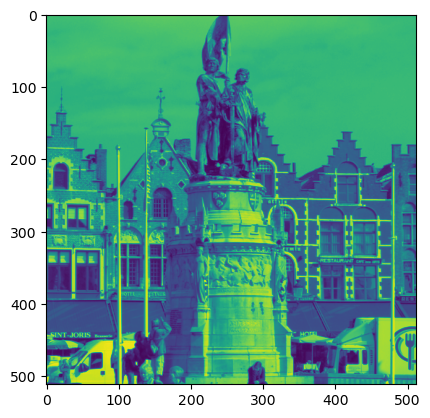

In [6]:
image = cv2.imread('data/Image00001.tif', cv2.IMREAD_GRAYSCALE)
plt.imshow(image)

In [10]:
first_plane = get_1_binary_plane(image)
noise = generate_noise(first_plane.shape)

<AxesSubplot:>

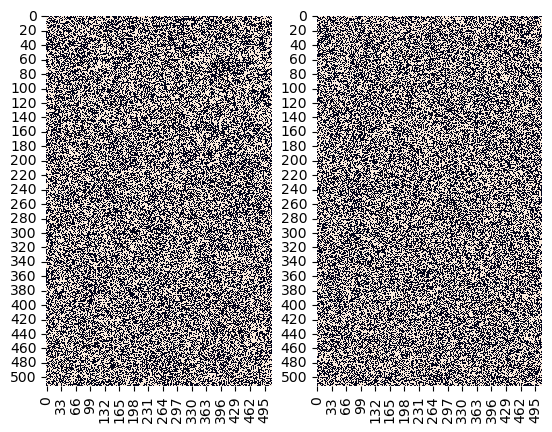

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2)
sns.heatmap(first_plane, ax=ax1, cbar=False)
sns.heatmap(noise, ax=ax2, cbar=False)

In [15]:
seed = 322
N_b = 32500
noise = generate_noise((N_b, ))
print((N_b * 8) / (512 * 512))
permutations_map = generate_permutations_map((512, 512), seed)

0.9918212890625


In [16]:
def lsb_replacement(image, payload, permutations_map, verbose=False):
    number_of_replacement = 0
    first_plane = get_1_binary_plane(image)

    for bin_idx, _bin in enumerate(payload):
        y_pos, x_pos = permutations_map[bin_idx]

        if _bin != first_plane[y_pos, x_pos]:
            number_of_replacement += 1
            
        first_plane[y_pos, x_pos] = _bin
    if verbose:
        print('Total number of replacement', number_of_replacement)

In [17]:
def encode(image_path, q, verbose=False):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    N_b = int(np.prod([*image.shape, q]) / 8)
    if verbose:
        print("Signal's length: ", N_b)

    payload = generate_noise((N_b, ))
    encoded_image = image.copy()
    lsb_replacement(encoded_image, payload, permutations_map, verbose)
    return image, encoded_image, payload

In [18]:
image, encoded_image, signal = encode('data/Image00001.tif', q=0.9, verbose=True)

Signal's length:  29491
Total number of replacement 14772


0.0


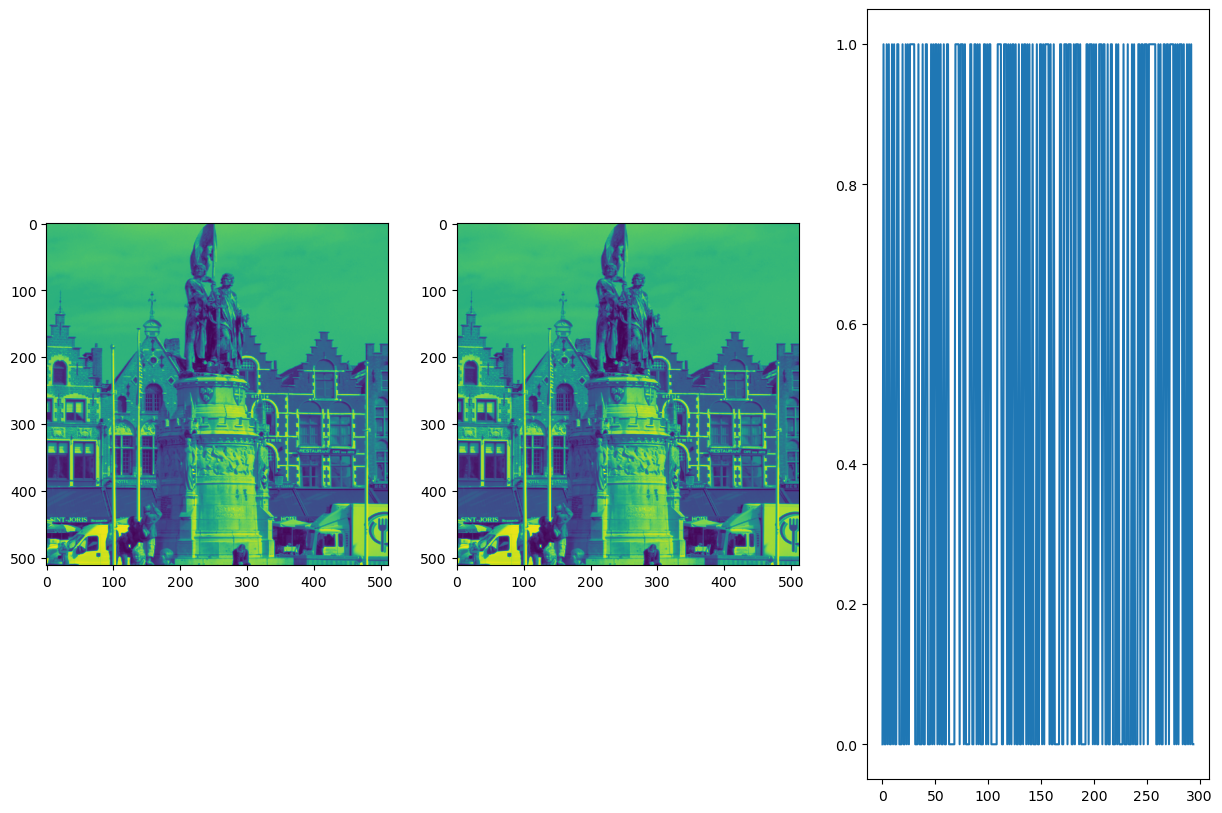

In [19]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 10))
ax1.imshow(image)
ax2.imshow(encoded_image)
ax3.plot(signal[::100])
print(rmse(image, encoded_image))

In [113]:
decimal_to_binary(10)

'00001010'

In [116]:
int('00001010', base=2)

10

In [126]:
515 * 512 / 8

32960.0